# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def is_alphanumeric(char):
    return char.isalpha() or char.isdigit()

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if is_alphanumeric(char) or char.isspace()])
    return text

def generate_ngrams(text, n):
    words = text.split()
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

def count_ngrams(ngrams):
    ngram_counts = {}
    for ngram in ngrams:
        if ngram in ngram_counts:
            ngram_counts[ngram] += 1
        else:
            ngram_counts[ngram] = 1
    return ngram_counts

def calculate_bigram_probabilities(text):
    words = text.split()
    bigrams = generate_ngrams(text, 2)
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    bigram_probabilities = {}
    for bigram in bigrams:
        w1, w2 = bigram
        bigram_count = bigrams.count(bigram)
        word_count = word_counts[w1]
        probability = bigram_count / word_count
        bigram_probabilities[bigram] = probability
    return bigram_probabilities

def extract_noun_phrases(text):
    words = text.split()
    noun_phrases = [word for word in words if len(word) > 2]
    return noun_phrases

def calculate_relative_probabilities(dataset):
    max_freq = {}
    for text in dataset:
        noun_phrases = extract_noun_phrases(text)
        for noun in noun_phrases:
            if noun in max_freq:
                max_freq[noun] = max(max_freq[noun], noun_phrases.count(noun))
            else:
                max_freq[noun] = noun_phrases.count(noun)

    relative_probabilities = {}
    for i, text in enumerate(dataset):
        noun_phrases = extract_noun_phrases(text)
        freq = {}
        for noun in noun_phrases:
            if noun in freq:
                freq[noun] += 1
            else:
                freq[noun] = 1
        probabilities = {noun: freq[noun] / max_freq[noun] for noun in freq}
        relative_probabilities[f"Text {i+1}"] = probabilities

    return relative_probabilities

def print_table(data):
    print("{:<10}".format(""), end="")
    for column in data[next(iter(data))]:
        print("{:<15}".format(column), end="")
    print()
    for row, values in data.items():
        print("{:<10}".format(row), end="")
        for value in values.values():
            print("{:<15}".format(round(value, 2)), end="")
        print()

# Read dataset from CSV file manually
dataset = []
with open('/content/drive/MyDrive/1000_reviews_cleaned (1).csv', 'r', encoding='utf-8') as file:
    for line in file:
        dataset.append(line.strip())

# Task 1: Count the frequency of all the N-grams (N=3)
n = 3
ngram_counts = count_ngrams(generate_ngrams(preprocess_text(' '.join(dataset)), n))
print("N-gram Counts:", ngram_counts)

# Task 2: Calculate the probabilities for all the bigrams in the dataset
bigram_probabilities = {}
for text in dataset:
    preprocessed_text = preprocess_text(text)
    text_bigram_probabilities = calculate_bigram_probabilities(preprocessed_text)
    bigram_probabilities.update(text_bigram_probabilities)

# Write bigram probabilities to a file
with open('bigram_probabilities.txt', 'w') as f:
    for bigram, probability in bigram_probabilities.items():
        f.write(f"{bigram}: {probability}\n")

print("Bigram probabilities written to bigram_probabilities.txt file.")

# Task 3: Extract all the noun phrases and calculate the relative probabilities
relative_probabilities = calculate_relative_probabilities(dataset)
print("Relative Probabilities:")
print_table(relative_probabilities)


N-gram Counts: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Bigram probabilities written to bigram_probabilities.txt file.
Relative Probabilities:
          Review,Cleaned_Review
Text 1    1.0            
Text 2    1.0            0.06           1.0            1.0            0.5            0.08           0.14           0.5            0.18           0.18           0.21           0.09           0.09           0.12           0.17           0.1            0.5            1.0            0.11           0.14           0.33           0.14           1.0            0.07           0.33           0.09           1.0            1.0            1.0            0.05           1.0            0.05           0.08           1.0            0.5            0.25           0.29           0.5            0.5            0.5            1.0            0.33           1.0            1.0            0.08           1.0            1.0            1.0            1.0            1.0            0.2            0.12           1.0            0.5            0.02           0.1            0.17 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [3]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # Tokenize text into words
    words = text.split()
    # Remove stopwords
    stopwords = set(['the', 'a', 'an', 'and', 'is', 'with', 'or', 'of', 'for', 'in', 'to', 'on', 'at', 'by'])
    words = [word for word in words if word not in stopwords]
    return words

def calculate_tf(text):
    tf = {}
    word_count = len(text)
    for word in text:
        if word in tf:
            tf[word] += 1 / word_count
        else:
            tf[word] = 1 / word_count
    return tf

def calculate_idf(documents):
    idf = {}
    total_documents = len(documents)
    for document in documents:
        unique_words = set(document)
        for word in unique_words:
            if word in idf:
                idf[word] += 1
            else:
                idf[word] = 1
    for word, freq in idf.items():
        idf[word] = total_documents / (freq + 1)
    return idf

def calculate_tf_idf(tf, idf):
    tf_idf = {}
    for word, tf_value in tf.items():
        tf_idf[word] = tf_value * idf[word]
    return tf_idf

def dot_product(vec1, vec2):
    result = 0
    for key in vec1:
        if key in vec2:
            result += vec1[key] * vec2[key]
    return result

def magnitude(vec):
    mag_squared = sum(value ** 2 for value in vec.values())
    return mag_squared ** 0.5 if mag_squared > 0 else 0

def cosine_similarity(vec1, vec2):
    dot = dot_product(vec1, vec2)
    mag1 = magnitude(vec1)
    mag2 = magnitude(vec2)
    if mag1 == 0 or mag2 == 0:
        return 0
    return dot / (mag1 * mag2)

# Read dataset from CSV file manually
dataset_filepath = "/content/drive/MyDrive/1000_reviews_cleaned (1).csv"
documents = []

with open(dataset_filepath, 'r', encoding='utf-8') as file:
    for line in file:
        document = line.strip()
        if document:
            documents.append(document)

# Preprocess documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Calculate TF for each document
tfs = [calculate_tf(doc) for doc in preprocessed_documents]

# Calculate IDF
idf = calculate_idf(preprocessed_documents)

# Calculate TF-IDF matrix
tf_idf_matrix = [calculate_tf_idf(tf, idf) for tf in tfs]

# Example query
query = "An Outstanding movie with a haunting performance and best character development"

# Preprocess query
preprocessed_query = preprocess_text(query)

# Calculate TF for query
tf_query = calculate_tf(preprocessed_query)

# Calculate TF-IDF vector for query
tf_idf_query = calculate_tf_idf(tf_query, idf)

# Calculate cosine similarity between query and each document
similarities = [cosine_similarity(tf_idf_query, tf_idf_doc) for tf_idf_doc in tf_idf_matrix]

# Rank documents based on cosine similarity
ranked_documents = sorted(zip(documents, similarities), key=lambda x: x[1], reverse=True)

# Print ranked documents
print("Ranked Documents:")
for i, (document, similarity) in enumerate(ranked_documents):
    print(f"{i+1}. {document} - Similarity: {similarity:.2f}")


Ranked Documents:
1. "This has to be one of the best movies ever made! Fight Club tells the tale of an insomniac who is losing his grip on reality. Then, he meets Tyler, and that is when all hell breaks out! The narration given by Edward Norton is powerful and haunting, and it makes the suspense and terror seem that more realistic. This is the kind of movie where you cannot tell the story to others too much without giving the whole movie away. The ending is one of the best I have ever seen in a movie since Usual Suspects. This is a powerful movie which will make you believe that chaos can end all existence. I think EVERYONE should see this movie. It is gruesome and violent at times, but it's worth it! It's a shame that I can only give it 5 stars. It really should be 100 stars, or even more! Fight Club is without a doubt one of the best movies ever made!",This one best movie ever made Fight Club tell tale insomniac losing grip reality Then meet Tyler hell break The narration given Edwar

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


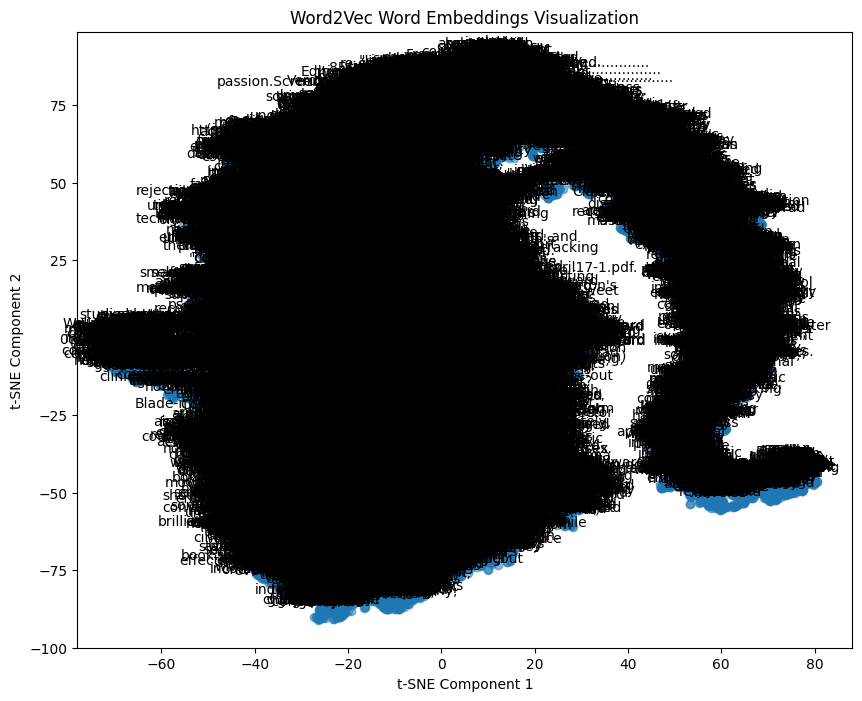

In [5]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your dataset
dataset_filepath = "/content/drive/MyDrive/1000_reviews_cleaned (1).csv"
df = pd.read_csv(dataset_filepath)

# Preprocess text data (assuming 'Review' column contains text)
sentences = [review.split() for review in df['Review'].tolist()]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, sg=0)

# Visualize word embeddings using t-SNE
word_vectors = model.wv
words = list(word_vectors.key_to_index.keys())
vectors = word_vectors[words]

tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Plot word embeddings
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.5)
for word, (x, y) in zip(words, vectors_2d):
    plt.annotate(word, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
plt.title("Word2Vec Word Embeddings Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [6]:
# The GitHub link of your final csv file


# Link: https://github.com/NityaKorada/INFO-5731/blob/main/annotated_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [7]:
# Type your answer
""" This total assignmet is challenging. Takes long time to undertand and work on the tasks.
Need lot of time to work on these. We'll be having another course assignments also. I think it would be better if
we are having less questions and more time.
In the quetion 4 we need to read each review collected in the assignment 2 i.e almost we have 1000 reviews collected.
Reading and annotating each sentiment manually hectic.
"""

" This total assignmet is challenging. Takes long time to undertand and work on the tasks.\nNeed lot of time to work on these. We'll be having another course assignments also. I think it would be better if\nwe are having less questions and more time.\nIn the quetion 4 we need to read each review collected in the assignment 2 i.e almost we have 1000 reviews collected. \nReading and annotating each sentiment manually hectic. \n"